# **UCI Heart Disease Data Set: Exploration and ML Modelling** 

*Note:*

*Thanks to author of https://www.kaggle.com/code/nareshbhat/eda-classification-ensemble-92-accuracy notebook, NARESH BHAT. This notebook was a copy of that original version, but will differ significantly when its completed. Please upvote my notebook as well as Naresh's one, if you find below contents useful.*

## **Background**

The original dataset is sourced from the following four healthcare institutes. They are listed below, along with the contributors:
Source:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor is mentioned as follows in the original website:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Regarding dataset characteristics, I will just quote the original description in the UCI machine learning repository website. (we'll explore more when we do Exploratory Data Analysis(EDA)):


>*This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.*


### Regarding Heart Disease 

The term 'heart disease' usually refers to "coronary heart disease", a clinical condition caused by obstruction in vessels that supply blood to heart(called 'coronary blood vessels'). Critical obstructions, usually 100% of a blockage or multiple blockages, will cause heart attacks.Here are some other points that I thought important to get a feel for the importance of tackling this challenge.

- Heart disease is part of a group of conditions known as Cardiovascular diseases (CVDs), which is the leading cause of death globally. 
- They all have a similar pathological background: gradual accumilation of cholesterol deposits or calcifications in blood vessels leads to inadequate blood supply to vital organs, followed by lack of oxygen, which can result in 'death' of certain parts of these organs. 
- Lack of blood supply to brain causes stroke, same for legs and arms cause peripheral vascular disease. 
- According to World Health Organization(WHO),CVDs represent 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.  And Over three quarters of CVD deaths take place in low- and middle-income countries.

Also,

- Heart disease can be prevented and controlled by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
- Therefore, it is important to detect it as early as possible so that management with counselling and medicines can begin.

### Target variable

The challenge here is to train a ML model to predict the presence(denoted as '1' in the dataset), or absence('0') of heart disease, using other variables in this tabluar dataset. This is called the 'Target' or 'Ground truth' or 'Label' in ML lingo. 

According to the authors, the presence of heart disease was defined according to the angiography finding. Coronary angiogram is the gold-standard test to detect coronary heart disease. It's performed by passing a catheter via a guided wire to the heart, and injecting a dye, which will pass through the catheter to your coronary blood vessels(specifically arteries). Then series of X-rays are taken, and the blockages are identified by observing the places where either the dye doesn't passthrough or the flow is significantly reduced.  

More than 50% of a block in angiogram is taken as 'presence' ('1') of heart disease in the dataset. 

<div>
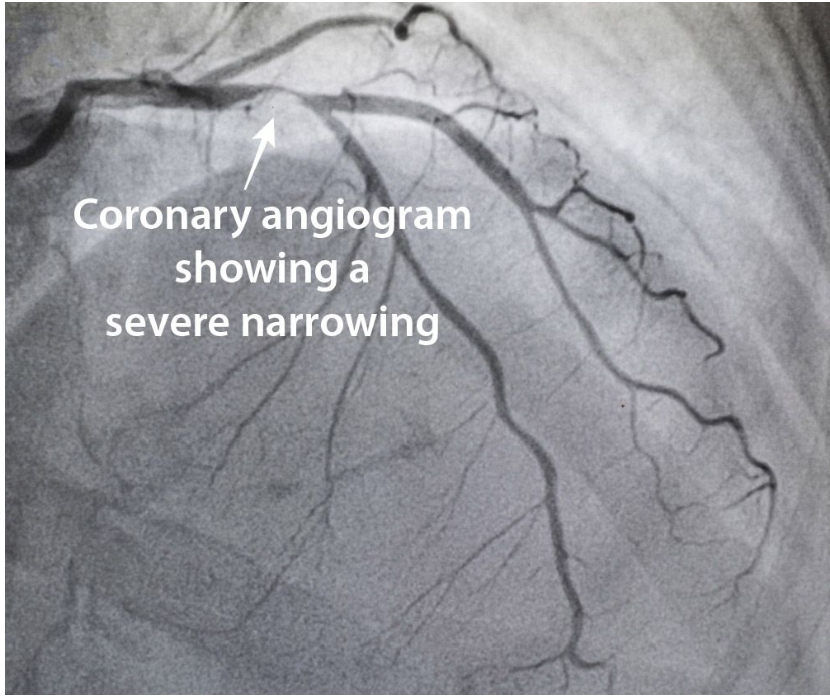
</div>




## **Exploratory Data Analysis** 

### Importing the required libraries and packages

I will import some of the libraries at the start as below, but we'll import some others as we need them later.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We'll get the dataset into a pandas dataframe so that we can explore it easily.

In [2]:
heart_df = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
heart_df.head(10) #gives us the first 10 rows of the dataset

By the look of it, all of the columns or features are numerical. This is important since ML algorithms can't train with string/object data. You need to represent them in numbers. But we don't have to worry about it here. 'Target' column, is well, the target or label we train the model to predict. This is therefore a [supervised machine learning](https://www.geeksforgeeks.org/supervised-unsupervised-learning/) problem. (geeksforgeeks.org is an awesome resource for data science beginners btw!)

Most feature names(eg: cp, trestbps etc.) are abbreviated. So we'll very briefly try to understand what they mean (only the ones are not obvious):

<div>
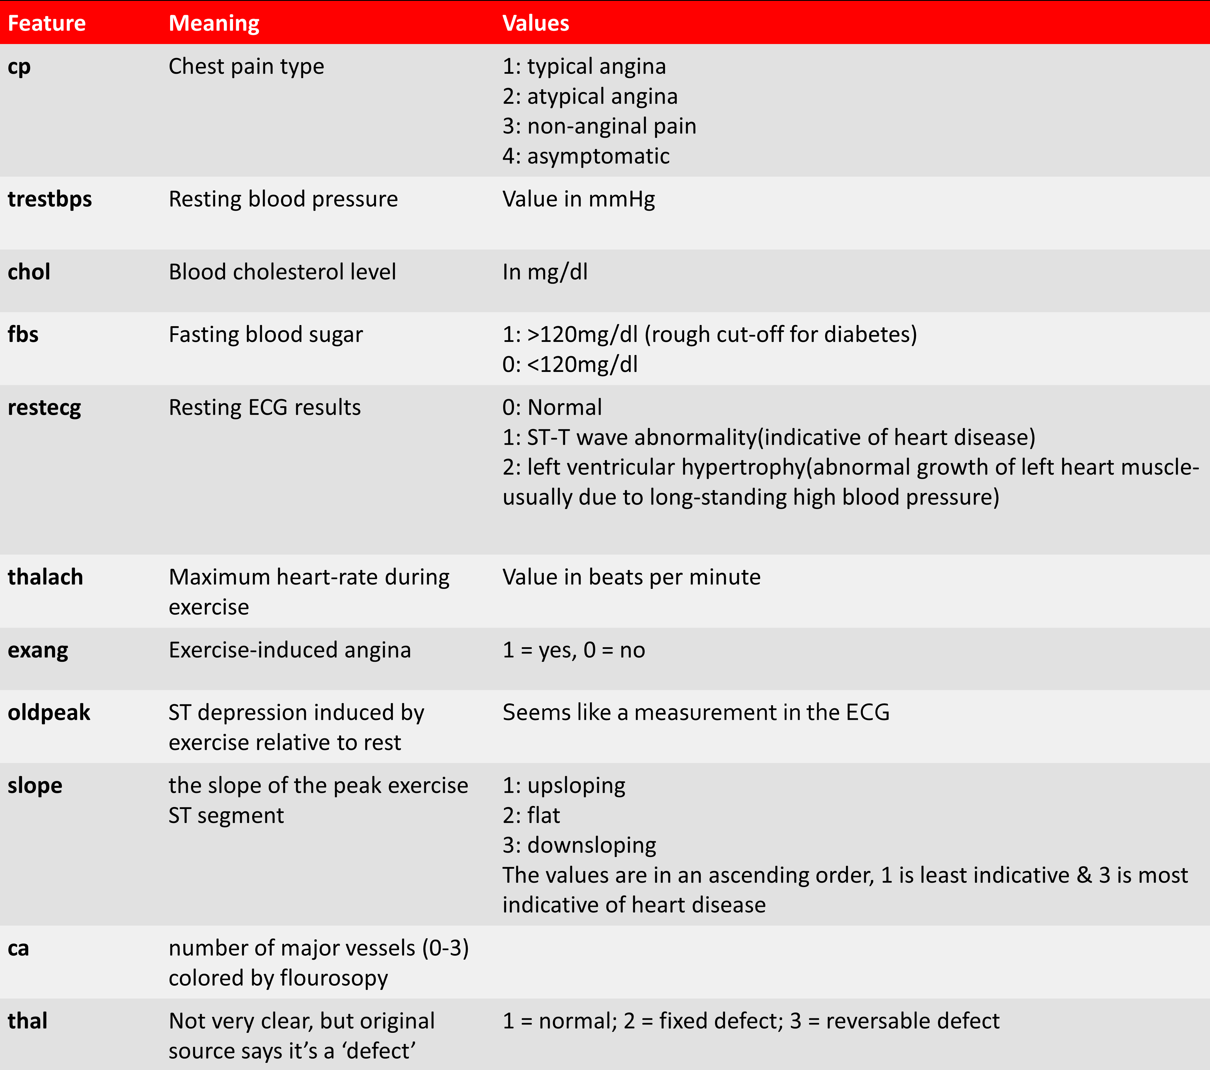
</div>

!


## Packages Required

In [ ]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [ ]:
data = pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

In [ ]:
data.info()

### **Missing Value Detection**

In [ ]:
data.isnull().sum()

### **Descriptive statistics**

In [ ]:
data.describe()

## **EDA**

In [ ]:
pp.ProfileReport(data)

## **Model prepration**

In [ ]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem**

In [ ]:
print(y_test.unique())
Counter(y_train)

## **ML models**

Here I take different machine learning algorithm and try to find algorithm which predict accurately.

1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine


In [ ]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

In [ ]:

m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

In [ ]:
imp_feature = pd.DataFrame({'Feature': ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'], 'Importance': xgb.feature_importances_})
plt.figure(figsize=(10,4))
plt.title("barplot Represent feature importance ")
plt.xlabel("importance ")
plt.ylabel("features")
plt.barh(imp_feature['Feature'],imp_feature['Importance'],color = 'rgbkymc')
plt.show()

In [ ]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(y_test,xgb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)


sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='Extreme Gradient Boost')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# **Model Evaluation**

In [ ]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## **Ensembling**

> In order to increase the accuracy of the model we use ensembling. Here we use stacking technique.

### About Stacking 

> Stacking or Stacked Generalization is an ensemble machine learning algorithm. It uses a meta-learning algorithm to learn how to best combine the predictions from two or more base machine learning algorithms. The base level often consists of different learning algorithms and therefore stacking ensembles are often heterogeneous.The stacking ensemble is illustrated in the figure below

> <img style="float: centre;" src="https://mlfromscratch.com/content/images/2020/01/image-2.png" width="400px"/>

In [ ]:
scv=StackingCVClassifier(classifiers=[xgb,knn,svc],meta_classifier= svc,random_state=42)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
print("confussion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

# **Conclusion**

1) Extreme Gradient Boost gives the best Accuracy compared to other models.

2) Exercise induced angina,Chest pain is major symptoms of heart attack.

3) Ensembling technique increase the accuracy of the model.

**Feel free to ask any question related to this topic. I'm happy to answer. If you like my work please upvote.**

**HAPPY LEARNING :-)**